#For single Image Fitting Ellipse on Ground truth mask(TASK_2) and finding extreme points of major and minor axis

Major axis endpoints:  (495, 415) (323, 340)
Minor axis endpoints:  (364, 480) (454, 275)


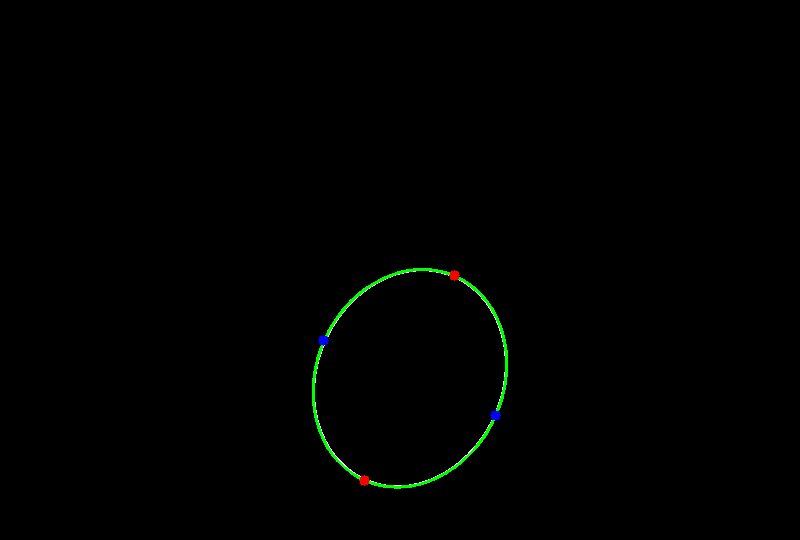

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/drive/MyDrive/Origin_Medical/Task - Segmentation/masks/000_HC_Annotation.png', 0)
# Threshold the image to isolate the ellipse
_, thresholded = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


cnt = max(contours, key=cv2.contourArea)

ellipse = cv2.fitEllipse(cnt)

result_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.ellipse(result_image, ellipse, (0, 255, 0), 2)

# parameters of the ellipse
(center, axes, angle) = ellipse
(cx, cy) = center
(major_axis, minor_axis) = axes
major_axis /= 2
minor_axis /= 2

theta = np.deg2rad(angle)

# Major axis points
major_end1 = (int(cx + major_axis * np.cos(theta)), int(cy + major_axis * np.sin(theta)))
major_end2 = (int(cx - major_axis * np.cos(theta)), int(cy - major_axis * np.sin(theta)))

# Minor axis points (perpendicular to major axis)
theta += np.pi / 2
minor_end1 = (int(cx + minor_axis * np.cos(theta)), int(cy + minor_axis * np.sin(theta)))
minor_end2 = (int(cx - minor_axis * np.cos(theta)), int(cy - minor_axis * np.sin(theta)))


print("Major axis endpoints: ", major_end1, major_end2)
print("Minor axis endpoints: ", minor_end1, minor_end2)

# result
cv2.circle(result_image, major_end1, 5, (255, 0, 0), -1)
cv2.circle(result_image, major_end2, 5, (255, 0, 0), -1)
cv2.circle(result_image, minor_end1, 5, (0, 0, 255), -1)
cv2.circle(result_image, minor_end2, 5, (0, 0, 255), -1)
cv2_imshow(result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Convert all GT masks containg ellipse extreme points i.e 8 points (4 co-ordinates) and appending it to CSV file. Which will be our new ground truth

In [ ]:
import cv2
import numpy as np
import pandas as pd
import os

directory = '/content/drive/MyDrive/Origin_Medical/Task - Segmentation/masks'

data = []

for filename in os.listdir(directory):
    if filename.endswith('.png'):

        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path, 0)

        _, thresholded = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if contours:  # Ensure there is at least one contour found
            cnt = max(contours, key=cv2.contourArea)
            ellipse = cv2.fitEllipse(cnt)

            (center, axes, angle) = ellipse
            (cx, cy) = center
            (major_axis, minor_axis) = axes
            major_axis /= 2  # Half length
            minor_axis /= 2

            # extreme points on the major and minor axis
            theta = np.deg2rad(angle)


            major_end1 = (int(cx + major_axis * np.cos(theta)), int(cy + major_axis * np.sin(theta)))
            major_end2 = (int(cx - major_axis * np.cos(theta)), int(cy - major_axis * np.sin(theta)))


            theta += np.pi / 2
            minor_end1 = (int(cx + minor_axis * np.cos(theta)), int(cy + minor_axis * np.sin(theta)))
            minor_end2 = (int(cx - minor_axis * np.cos(theta)), int(cy - minor_axis * np.sin(theta)))

            # Create a dictionary for the row
            row = {
                'image_name': filename,
                'ofd_1_x': major_end1[0], 'ofd_1_y': major_end1[1],
                'ofd_2_x': major_end2[0], 'ofd_2_y': major_end2[1],
                'bpd_1_x': minor_end1[0], 'bpd_1_y': minor_end1[1],
                'bpd_2_x': minor_end2[0], 'bpd_2_y': minor_end2[1]
            }
            data.append(row)

df = pd.DataFrame(data)

csv_path = '/content/drive/MyDrive/Origin_Medical/new_GT_coordinates.csv'
df.to_csv(csv_path, index=False)
print(f"CSV file has been saved to {csv_path}")


CSV file has been saved to /content/drive/MyDrive/Origin_Medical/new_GT_coordinates.csv


In [ ]:
pd.read_csv('/content/drive/MyDrive/Origin_Medical/new_GT_coordinates.csv')

,image_name,ofd_1_x,ofd_1_y,ofd_2_x,ofd_2_y,bpd_1_x,bpd_1_y,bpd_2_x,bpd_2_y
0,000_HC_Annotation.png,495,415,323,340,364,480,454,275
1,002_HC_Annotation.png,137,258,430,125,204,16,363,367
2,010_HC_Annotation.png,217,251,481,249,347,94,350,405
3,010_2HC_Annotation.png,483,272,216,240,331,412,368,101
4,001_HC_Annotation.png,416,309,388,133,290,239,515,204
...,...,...,...,...,...,...,...,...,...
617,495_HC_Annotation.png,393,382,390,130,232,258,551,255
618,499_2HC_Annotation.png,410,488,425,97,190,284,645,301
619,499_HC_Annotation.png,386,498,366,117,138,320,614,295
620,498_HC_Annotation.png,397,467,410,74,130,261,678,279


#Post_Processing CSV

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Origin_Medical/new_GT_coordinates.csv')

df['image_name'] = df['image_name'].str.replace('_Annotation', '')

df.to_csv('/content/drive/MyDrive/Origin_Medical/new_GROUND_TRUTH_coordinates.csv', index=False)


In [ ]:
pd.read_csv('/content/drive/MyDrive/Origin_Medical/new_GROUND_TRUTH_coordinates.csv')

,image_name,ofd_1_x,ofd_1_y,ofd_2_x,ofd_2_y,bpd_1_x,bpd_1_y,bpd_2_x,bpd_2_y
0,000_HC.png,495,415,323,340,364,480,454,275
1,002_HC.png,137,258,430,125,204,16,363,367
2,010_HC.png,217,251,481,249,347,94,350,405
3,010_2HC.png,483,272,216,240,331,412,368,101
4,001_HC.png,416,309,388,133,290,239,515,204
...,...,...,...,...,...,...,...,...,...
617,495_HC.png,393,382,390,130,232,258,551,255
618,499_2HC.png,410,488,425,97,190,284,645,301
619,499_HC.png,386,498,366,117,138,320,614,295
620,498_HC.png,397,467,410,74,130,261,678,279


# Cheking for random image from data; whether our new ground truth is correct or not

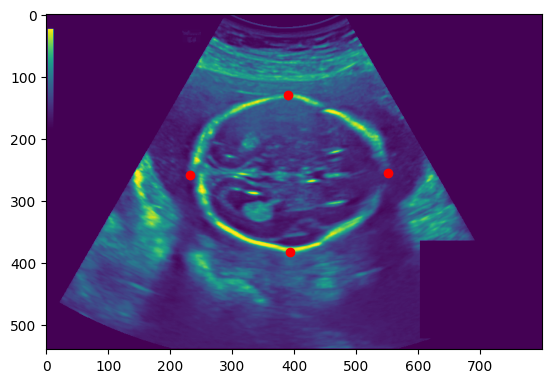

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def plot_image_with_dots(image_path, coordinates):
    image = Image.open(image_path)
    fig, ax = plt.subplots()
    ax.imshow(image)
    for i in range(0, len(coordinates), 2):
        x, y = coordinates[i], coordinates[i+1]
        ax.plot(x, y, 'ro')  # 'ro' specifies red dots
    plt.show()

image_path = "/content/drive/MyDrive/Origin_Medical/Task - Landmark/images/495_HC.png"
coordinates = [393,	382,	390,	130,	232,	258,	551,	255]
plot_image_with_dots(image_path, coordinates)
